In [ ]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Comment/balanced_data.csv")

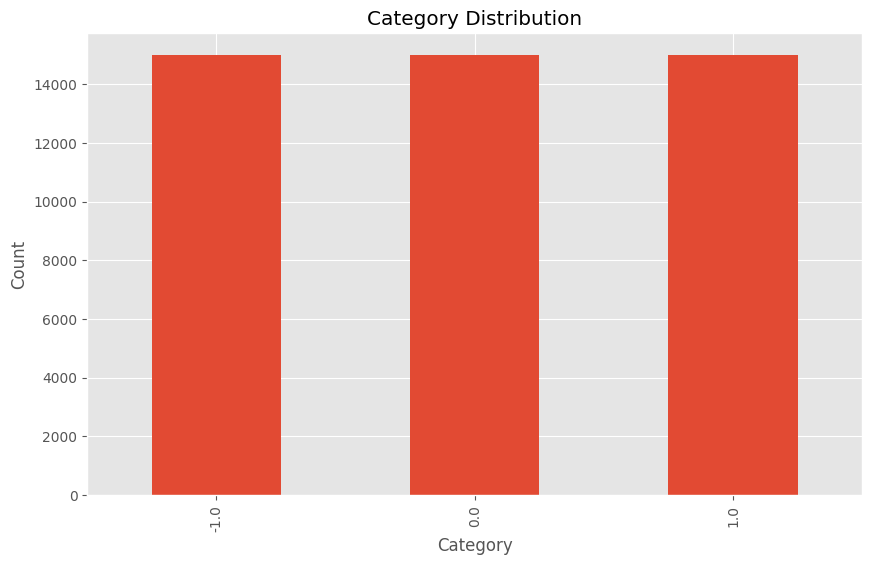

In [ ]:
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

In [ ]:
df.rename(columns = {"clean_text":"text"},inplace = True)

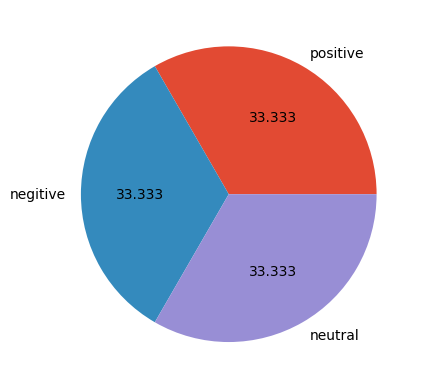

In [ ]:
plt.pie(df["category"].value_counts(),labels = ["positive","negitive","neutral"],autopct="%0.3f")
plt.show()

In [ ]:
pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
empty_tweet=df['text'].isna().value_counts()
print(empty_tweet)

text
False    44997
True         3
Name: count, dtype: int64


In [ ]:
df['clean_tweet']= df['text'].copy()
df

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi,-1.0,where baati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your pappu cannot even break grass just apprec...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
#handle emoji
df['clean_tweet'] = df['clean_tweet'].fillna('')

# Define a function to convert emojis to their textual representation
def convert_emoji(text):
    return emoji.demojize(text)

# Apply the convert_emoji() function to the clean_tweet column
df['clean_tweet'] = df['clean_tweet'].apply(convert_emoji)

# Create a new dataframe to store the converted tweets
new_df = pd.DataFrame(df['clean_tweet'], columns=['clean_tweet'])
new_df

,clean_tweet
0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...
...,...
44995,your pappu cannot even break grass just apprec...
44996,last election modi made many promises most the...
44997,proud india cintict and modi
44998,sir are proud having our narendra modi india


In [ ]:
df[['clean_tweet']]=new_df[['clean_tweet']].copy()
df

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi,-1.0,where baati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your pappu cannot even break grass just apprec...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
def preprocessing_one(df):
    #lower all characters
    df['clean_tweet'] = df['clean_tweet'].str.lower()
    #remove all the mentions: @username
    df['clean_tweet'] = df['clean_tweet'].replace(r'@\w+', '', regex=True)
    #remove all the links in the original tweets (start with "www" and "http")
    df['clean_tweet'] = df['clean_tweet'].replace(r'http\S+|rhttps\S+|rwww\S+', '', regex=True)
    return df
#Notice: Remove punctuation and special characters after handling contraction words
preprocessing_one(df)

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi,-1.0,where baati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your pappu cannot even break grass just apprec...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet
#re.sub(pattern, repl, string, count): pattern(Eligible pattern)，repl(replace to...), string
def repeated_char(word):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    repl_word = r'\1\2\3'
    if wordnet.synsets(word):
        return word  #test for words existence
    #repl_new= repeat_pattern.sub(repl_word, word)
    repl_new = re.sub(repeat_pattern, repl_word, word)
    if repl_new != word:
        return repeated_char(repl_new)
    else:
        return repl_new
word1='loooove'
print(repeated_char(word1))

love


In [ ]:
def check_repeated (tweet):
    repeat_pattern = r'(\w*)(\w+)(\2)(\w*)'
    word_set = [''.join(i) for i in re.findall(repeat_pattern, tweet)]  #find all the words with repeated characters
    for word in word_set:
        if not wordnet.synsets(word):
            tweet=re.sub(word, repeated_char(word), tweet)
    return tweet
#test the function
tweet1='I looove you, soooo much'
print(check_repeated (tweet1))

I love you, so much


In [ ]:
contraction_dict=[(r'I\'m', 'I am'),(r'i\'m', 'i am'),(r'ain\'t', 'am not'),(r'(\w+)\'s', '\g<1> is'),(r'(\w+)\'re', '\g<1> are'),(r'(\w+)n\'t', '\g<1> not'),
                  (r'can\'t', 'cannot'),(r'won\'t', 'will not'), (r'wont', 'will not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)\'d', '\g<1> would'), (r'(\w+)\'ve', '\g<1> have'),
                 (r'I\’m', 'I am'),(r'i\’m', 'i am'),(r'ain\’t', 'am not'),(r'(\w+)\’s', '\g<1> is'),(r'(\w+)\’re', '\g<1> are'),(r'(\w+)n\’t', '\g<1> not'),
                  (r'can\’t', 'cannot'),(r'won\’t', 'will not'), (r'(\w+)\’ll', '\g<1> will'), (r'(\w+)\’d', '\g<1> would'), (r'(\w+)\’ve', '\g<1> have')]
#Notice: The quotation of some texts are not in English
def handle_contraction(text):
    patterns_set=[(re.compile(pattern), repl) for (pattern, repl) in contraction_dict]
    for (pattern, repl) in patterns_set:
        text=re.sub(pattern, repl, text)
    return text
#test
print(df['clean_tweet'][4])
print(handle_contraction(df['clean_tweet'][4]))

rahul gandhis promise game changer while modis announcement violation model code conduct
slow claps for anchor 
rahul gandhis promise game changer while modis announcement violation model code conduct
slow claps for anchor 


In [ ]:
def preprocessing_two(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: check_repeated(x)) #remove repeated charaters
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: handle_contraction(x)) #handle constraction
    return df
df=preprocessing_two(df)
df

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your papu canot even break grass just apprecia...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
#only English character
def replace_non_alphabetical(df):
    df['clean_tweet']=df['clean_tweet'].replace('[^a-zA-Z]',' ', regex=True)
    df['clean_tweet'] = df['clean_tweet'].replace('\s+', ' ', regex=True)
    return df
df=replace_non_alphabetical(df)
df

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your papu canot even break grass just apprecia...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
def short_words(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w=="no"]))
    return df
df=short_words(df)
df.head()

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...


In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.head()

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         44997 non-null  object 
 1   category     45000 non-null  float64
 2   clean_tweet  45000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
missing_values = df['clean_tweet'].isnull()

# Replace missing values with an empty string or another placeholder
df.loc[missing_values, 'clean_tweet'] = ''

# Now, you can apply the `len` function to calculate the length of each string
df["num_characters"] = df["clean_tweet"].apply(len)

# Print the dataframe
print(df.head())

                                                text  category  \
0  its going good riddance from the failed modi g...      -1.0   
1  itself modi tremendous pressure failure all hi...      -1.0   
2  takluji yeh sab phaltu bakwass suun suun log g...      -1.0   
3  where baati bachao slogan killed one stroke modi       -1.0   
4  rahul gandhis promise game changer while modis...      -1.0   

                                         clean_tweet  num_characters  
0  its going good riddance from the failed modi g...             224  
1  itself modi tremendous pressure failure all hi...             236  
2  takluji yeh sab phaltu bakwas sun sun log gaye...             210  
3    where bati bachao slogan killed one stroke modi              47  
4  rahul gandhis promise game changer while modis...             110  


In [ ]:
df.isnull()

,text,category,clean_tweet,num_characters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
44995,False,False,False,False
44996,False,False,False,False
44997,False,False,False,False
44998,False,False,False,False


In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(44999, 4)

In [ ]:
df.dropna(inplace=True)

<ipython-input-28-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df.isnull().sum() , df.duplicated().sum()

(text              0
 category          0
 clean_tweet       0
 num_characters    0
 dtype: int64,
 0)

In [ ]:
df.shape

(44997, 4)

In [ ]:
# import nltk
nltk.download("punkt")

# from nltk.corpus import stopwords
nltk.download('stopwords')

# faltu symbol's
string.punctuation
# from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install nltk
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.0 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize text
    text_tokens = nltk.word_tokenize(text)

    # Initialize lemmatizer and stopwords
    lemmatizer = WordNetLemmatizer()
    english_stopwords = set(stopwords.words("english"))

    # Filter out non-alphanumeric tokens
    alphanumeric_tokens = [token for token in text_tokens if token.isalnum()]

    # Lemmatize tokens, remove stopwords, punctuation
    transformed_tokens = []
    for token in alphanumeric_tokens:
        lemma = lemmatizer.lemmatize(token)
        if lemma not in english_stopwords and lemma not in string.punctuation:
            transformed_tokens.append(lemma)

    # Join tokens back into a string
    transformed_text = " ".join(transformed_tokens)

    return transformed_text

df["transformed_text"]=df["clean_tweet"].apply(transform_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-33-8888a4f72171>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["clean_tweet"].apply(transform_text)


In [ ]:
df.head()

,text,category,clean_tweet,num_characters,transformed_text
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...,224,going good riddance failed modi government ele...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...,236,modi tremendous pressure failure skill little ...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...,210,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi,47,bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...,110,rahul gandhi promise game changer modis announ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
y = df["category"].values
print(y)

[-1. -1. -1. ...  1.  1.  1.]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train_scaled,y_train)
y_pred1 = gnb.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test, y_pred1))

0.6733333333333333
[[1762  879  425]
 [ 100 2725   78]
 [ 596  862 1573]]
              precision    recall  f1-score   support

        -1.0       0.72      0.57      0.64      3066
         0.0       0.61      0.94      0.74      2903
         1.0       0.76      0.52      0.62      3031

    accuracy                           0.67      9000
   macro avg       0.69      0.68      0.66      9000
weighted avg       0.70      0.67      0.66      9000



In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test, y_pred2))

0.7072222222222222
[[2081  627  358]
 [ 272 2465  166]
 [ 551  661 1819]]
              precision    recall  f1-score   support

        -1.0       0.72      0.68      0.70      3066
         0.0       0.66      0.85      0.74      2903
         1.0       0.78      0.60      0.68      3031

    accuracy                           0.71      9000
   macro avg       0.72      0.71      0.70      9000
weighted avg       0.72      0.71      0.70      9000



In [ ]:
bnb.fit(X_train_scaled,y_train)
y_pred3 = bnb.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.7388888888888889
[[2249  425  392]
 [ 375 2330  198]
 [ 570  390 2071]]
              precision    recall  f1-score   support

        -1.0       0.70      0.73      0.72      3066
         0.0       0.74      0.80      0.77      2903
         1.0       0.78      0.68      0.73      3031

    accuracy                           0.74      9000
   macro avg       0.74      0.74      0.74      9000
weighted avg       0.74      0.74      0.74      9000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'NB': mnb,
    'LR': lrc,
    'RF': rfc,
    'BgC': bc,
    'ETC': etc
}

In [ ]:
lrc.fit(X_train_scaled,y_train)
y_pred3 = lrc.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.8447777777777777
[[2504  265  297]
 [ 172 2618  113]
 [ 281  269 2481]]
              precision    recall  f1-score   support

        -1.0       0.85      0.82      0.83      3066
         0.0       0.83      0.90      0.86      2903
         1.0       0.86      0.82      0.84      3031

    accuracy                           0.84      9000
   macro avg       0.85      0.85      0.84      9000
weighted avg       0.85      0.84      0.84      9000



In [ ]:
def calculate_precision(tp, fp):
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def calculate_recall(tp, fn):
    if tp + fn == 0:
        return 0
    return tp / (tp + fn)

def calculate_f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

def calculate_metrics(true_positive, false_positive, false_negative):
    precision = calculate_precision(true_positive, false_positive)
    recall = calculate_recall(true_positive, false_negative)
    f1_score = calculate_f1_score(precision, recall)
    return precision, recall, f1_score

# Example usage:
true_positive_1 = 2481
false_positive_1 = 269
false_negative_1 = 281

true_positive_0 = 2618
false_positive_0 = 113
false_negative_0 = 281

true_positive_minus_1 = 2504
false_positive_minus_1 = 265
false_negative_minus_1 = 297

precision_1, recall_1, f1_score_1 = calculate_metrics(true_positive_1, false_positive_1, false_negative_1)
precision_0, recall_0, f1_score_0 = calculate_metrics(true_positive_0, false_positive_0, false_negative_0)
precision_minus_1, recall_minus_1, f1_score_minus_1 = calculate_metrics(true_positive_minus_1, false_positive_minus_1, false_negative_minus_1)

average_precision = (precision_1 + precision_0 + precision_minus_1) / 3
average_recall = (recall_1 + recall_0 + recall_minus_1) / 3
average_f1_score = (f1_score_1 + f1_score_0 + f1_score_minus_1) / 3

print("Category +1 Precision:", precision_1)
print("Category +1 Recall:", recall_1)
print("Category +1 F1 Score:", f1_score_1)
print()
print("Category 0 Precision:", precision_0)
print("Category 0 Recall:", recall_0)
print("Category 0 F1 Score:", f1_score_0)
print()
print("Category -1 Precision:", precision_minus_1)
print("Category -1 Recall:", recall_minus_1)
print("Category -1 F1 Score:", f1_score_minus_1)
print()
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1_score)

Category +1 Precision: 0.9021818181818182
Category +1 Recall: 0.8982621288921072
Category +1 F1 Score: 0.9002177068214804

Category 0 Precision: 0.9586232149395826
Category 0 Recall: 0.9030700241462574
Category 0 F1 Score: 0.9300177619893428

Category -1 Precision: 0.9042975803539184
Category -1 Recall: 0.893966440556944
Category -1 F1 Score: 0.8991023339317773

Average Precision: 0.9217008711584397
Average Recall: 0.8984328645317695
Average F1 Score: 0.9097792675808668


In [ ]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(lrc,open("model.pkl","wb"))

In [ ]:
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.7790988388243791
[[4339  951  744]
 [ 435 5341  192]
 [ 738  916 4343]]
              precision    recall  f1-score   support

        -1.0       0.79      0.72      0.75      6034
         0.0       0.74      0.89      0.81      5968
         1.0       0.82      0.72      0.77      5997

    accuracy                           0.78     17999
   macro avg       0.78      0.78      0.78     17999
weighted avg       0.78      0.78      0.78     17999



In [ ]:
bc.fit(X_train,y_train)
y_pred3 = bc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.7537640980054447
[[4071 1099  864]
 [ 479 5247  242]
 [ 777  971 4249]]
              precision    recall  f1-score   support

        -1.0       0.76      0.67      0.72      6034
         0.0       0.72      0.88      0.79      5968
         1.0       0.79      0.71      0.75      5997

    accuracy                           0.75     17999
   macro avg       0.76      0.75      0.75     17999
weighted avg       0.76      0.75      0.75     17999



In [ ]:
etc.fit(X_train,y_train)
y_pred3 = etc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.8272681815656425
[[4690  689  655]
 [ 293 5519  156]
 [ 648  668 4681]]
              precision    recall  f1-score   support

        -1.0       0.83      0.78      0.80      6034
         0.0       0.80      0.92      0.86      5968
         1.0       0.85      0.78      0.81      5997

    accuracy                           0.83     17999
   macro avg       0.83      0.83      0.83     17999
weighted avg       0.83      0.83      0.83     17999



In [ ]:
svc.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.7439857769876104
[[4407  876  751]
 [ 679 4884  405]
 [1127  770 4100]]
              precision    recall  f1-score   support

        -1.0       0.71      0.73      0.72      6034
         0.0       0.75      0.82      0.78      5968
         1.0       0.78      0.68      0.73      5997

    accuracy                           0.74     17999
   macro avg       0.75      0.74      0.74     17999
weighted avg       0.75      0.74      0.74     17999

